
# **Tarea: simulación y análisis de Paseos Aleatorios Simples**  


Esta tarea tiene como objetivo la implementación y análisis de paseos aleatorios simples en dos escenarios:  
1. **Tiempo discreto:** $t\in\{1,2,\ldots,\}$. 
2. **Tiempo continuo:** $t\in [0,  \infty)$.  

Además, se realizará un **análisis estadístico** del proceso en distintos instantes de tiempo y se utilizará el **método de Montecarlo** para validar las propiedades del proceso.

#### **Parte 1: Paseo Aleatorio Simple en tiempo discreto**  

Un **paseo aleatorio simple** es un proceso estocástico definido por:

$$
S_t = S_{t-1} + X_t, \quad t = 1, 2, 3, \dots
$$

donde:
- $S_t$  representa la posición en el instante  $t$.
- $X_t$  es una variable aleatoria i.i.d. tales que:
  $$
  X_t =
  \begin{cases} 
  +1, & \text{con probabilidad } \frac{1}{2} \\
  -1, & \text{con probabilidad } \frac{1}{2} 
  \end{cases}
  $$

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo discreto.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.


#### **Parte 2: Paseo Aleatorio Simple en tiempo continuo**  

Consideremos ahora la versión del **paseo aleatorio simple en tiempo continuo** donde $X_t \sim N(0,1)$ son variables aleatorias i.i.d. normales estándar.

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo continuo.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.


#### **Parte 3: Cálculo de Media y Varianza en Instantes Específicos**  

Consideremos ahora el **paseo aleatorio simple en tiempo discreto** de la Parte 1. Para analizar la evolución del proceso, se pide:

1. Calcular la **media muestral** y la **varianza muestral** de  $S_t$  en los tiempos: $t = 5$, $t = 15$ y $t = 25$.
2. Comprobar que los resultados son acordes a lo visto en clase.

#### **Parte 4: Simulaciones de Montecarlo para obtener propiedades estadísticas**  

Repetir 5000 veces la simulación de la Parte 1 (es decir, se generarán 200 realizaciones del paseo aleatorio simple discreto en cada repetición). Para cada experimento:

1. Se generarán 200 realizaciones del paseo aleatorio simple discreto.
2. Se calcularán las medias muestrales y varianzas muestrales en $t = 5$, $t = 15$ y $t = 25$.
3. Se almacenarán los valores de media y varianza obtenidos en cada una de las 5000 repeticiones.

Al finalizar, se calcularán:

1. La media de las 5000 medias muestrales para cada $ t $.
2. La media de las 5000 varianzas muestrales para cada $ t $.

##### **Preguntas para reflexionar**
- ¿Hacia qué valores esperas que converjan la media y la varianza muestral?  
- ¿Cómo se relacionan estos valores con las propiedades teóricas del paseo aleatorio?  
- ¿Cómo podrías verificar la ley de los grandes números en este contexto?



#### **Importar librerías**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### **Parte 1: Paseo Aleatorio Simple en tiempo discreto**

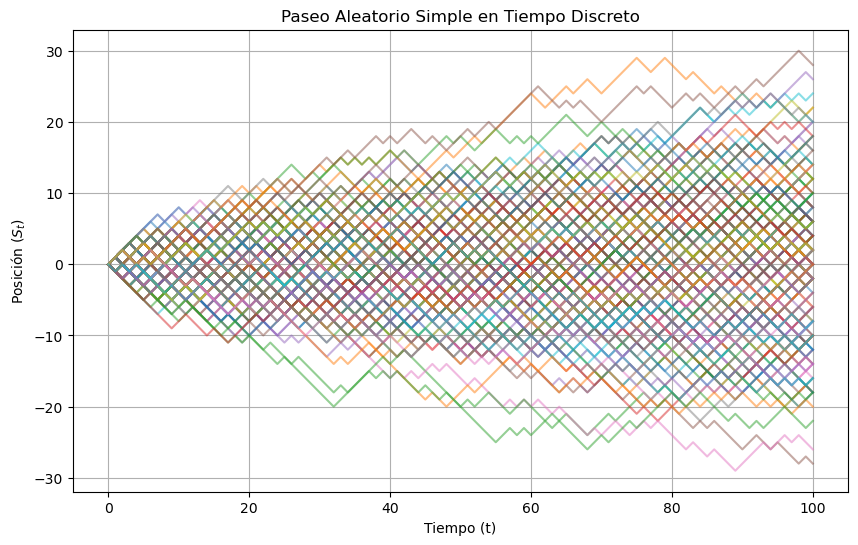

In [3]:
# Parámetros
np.random.seed(987)  # Fijar la semilla
num_realizaciones = 200  # Número de realizaciones
num_pasos = 100  # Número de pasos en el paseo

# Generar paseos aleatorios simples en tiempo discreto
pasos_discretos = np.random.choice([-1, 1], size=(num_realizaciones, num_pasos))
paseos_discretos_corr = np.cumsum(pasos_discretos, axis=1)
paseos_discretos_corr = np.column_stack((np.zeros(num_realizaciones), paseos_discretos_corr))

# Graficar
plt.figure(figsize=(10, 6))
for i in range(num_realizaciones):
    plt.plot(paseos_discretos_corr[i], alpha=0.5)

plt.title("Paseo Aleatorio Simple en Tiempo Discreto")
plt.xlabel("Tiempo (t)")
plt.ylabel("Posición ($S_t$)")
plt.grid(True)
plt.show()

#### **Parte 2: Paseo Aleatorio Simple en tiempo continuo**

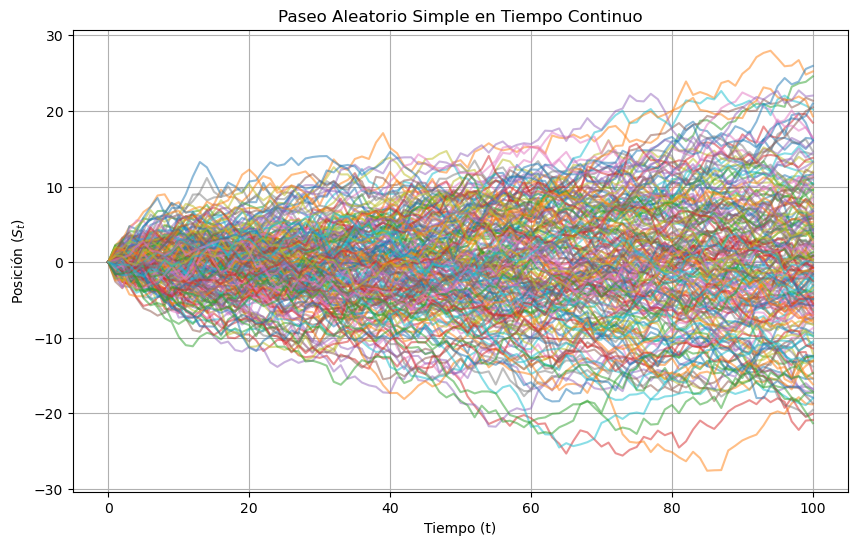

In [5]:
# Parámetros
np.random.seed(987)  # Fijar la semilla
num_realizaciones = 200  # Número de realizaciones
num_pasos = 100  # Número de pasos
delta_t = 1  # Incremento temporal

incrementos_continuos = np.random.normal(loc=0, scale=np.sqrt(delta_t), size=(num_realizaciones, num_pasos))
paseos_continuos_corr = np.cumsum(incrementos_continuos, axis=1)
paseos_continuos_corr = np.column_stack((np.zeros(num_realizaciones), paseos_continuos_corr))

# Graficar
plt.figure(figsize=(10, 6))
for i in range(num_realizaciones):
    plt.plot(paseos_continuos_corr[i], alpha=0.5)

plt.title("Paseo Aleatorio Simple en Tiempo Continuo")
plt.xlabel("Tiempo (t)")
plt.ylabel("Posición ($S_t$)")
plt.grid(True)
plt.show()

#### **Parte 3: Cálculo de Media y Varianza en Instantes Específicos**

In [ ]:
# Tiempos específicos para el análisis
tiempos_especificos = [5, 15, 25]


valores_t_corr = {t: paseos_discretos_corr[:, t] for t in tiempos_especificos}
resultados_t_corr = {t: (np.mean(valores), np.var(valores, ddof=1)) for t, valores in valores_t_corr.items()}

df_resultados_corr = pd.DataFrame.from_dict(
    resultados_t_corr,
    orient="index",
    columns=["Media Muestral", "Varianza Muestral"]
)

# Mostrar los resultados en una tabla
print("Resultados para el paseo aleatorio simple en tiempo discreto")
print(df_resultados_corr)

Resultados para el paseo aleatorio simple en tiempo discreto
    Media Muestral  Varianza Muestral
5             0.02           4.904121
15           -0.10          15.185930
25           -0.09          22.665226


#### **Parte 4: Simulaciones de Montecarlo para obtener propiedades estadísticas**

In [ ]:
# Parámetros de Montecarlo
num_experimentos = 5000

# Almacenar resultados
medias_t_corr = {t: [] for t in tiempos_especificos}
varianzas_t_corr = {t: [] for t in tiempos_especificos}

# Simulación de Montecarlo con S_0 = 0
np.random.seed(987)

for _ in range(num_experimentos):
    pasos = np.random.choice([-1, 1], size=(num_realizaciones, num_pasos))
    paseos_mc_corr = np.cumsum(pasos, axis=1)
    paseos_mc_corr = np.column_stack((np.zeros(num_realizaciones), paseos_mc_corr))
    
    # Calcular media y varianza en los tiempos específicos
    for t in tiempos_especificos:
        valores = paseos_mc_corr[:, t]
        medias_t_corr[t].append(np.mean(valores))
        varianzas_t_corr[t].append(np.var(valores, ddof=1))

# Calcular la media de las 5000 estimaciones corregidas
montecarlo_resultados_corr = {
    t: (np.mean(medias_t_corr[t]), np.mean(varianzas_t_corr[t])) for t in tiempos_especificos
}

# Crear un DataFrame con los resultados corregidos de Montecarlo
df_montecarlo_corr = pd.DataFrame.from_dict(
    montecarlo_resultados_corr,
    orient="index",
    columns=["Media de Medias", "Media de Varianzas"]
)

# Mostrar los resultados en una tabla
print("Resultados de Montecarlo para el paseo aleatorio simple en tiempo discreto")
print(df_montecarlo_corr)

Resultados de Montecarlo para el paseo aleatorio simple en tiempo discreto
    Media de Medias  Media de Varianzas
5         -0.000046            4.994342
15        -0.000312           14.971198
25         0.000184           24.973125


#### **Preguntas para reflexionar**
##### ¿Hacia qué valores esperas que converjan la media y la varianza muestral?

Para un paseo aleatorio simple en tiempo discreto, la teoría nos dice que la media esperada  
$ E[S_t] $ en el tiempo $ t $ es cero, dado que cada paso tiene una probabilidad igual de ser positivo o negativo.  
La varianza esperada $ \text{Var}(S_t) $ es proporcional a $ t $, es decir,  
$
\text{Var}(S_t) = t.
$
En nuestras simulaciones de Montecarlo, las medias muestrales tienden a 0 y las varianzas muestrales tienden aproximadamente a los valores esperados $ t $, validando la teoría.

##### ¿Cómo se relacionan estos valores con las propiedades teóricas del paseo aleatorio?
Los resultados obtenidos concuerdan con las propiedades de un paseo aleatorio simple:

- La esperanza matemática del proceso es 0 porque la caminata es simétrica en torno a su punto de inicio.
- La varianza crece linealmente con el tiempo, lo cual es característico de los procesos de tipo difusión como el movimiento browniano.
- En tiempo continuo, el proceso modelado sigue un movimiento browniano estándar, lo cual es un límite del paseo aleatorio discreto cuando el tamaño del paso y el tiempo entre pasos tienden a cero.

##### ¿Cómo podrías verificar la ley de los grandes números en este contexto?
La **Ley de los Grandes Números (LGN)** establece que, al aumentar el número de simulaciones, la media muestral de un proceso estocástico debe converger a su media teórica.

Para verificarla, podemos:

1. Aumentar el número de realizaciones y observar que la media muestral tiende a 0.
2. Observar que la media de las medias en la simulación de Montecarlo se acerca cada vez más a 0 conforme aumentamos el número de experimentos.
3. Graficar la evolución de la media muestral en función del número de simulaciones y ver que se estabiliza en 0.
4. Comparar la varianza muestral con la teórica \( t \) y observar que los valores convergen.